## Imports

Inspired by course https://www.udemy.com/course/complete-data-visualization-in-python/ <br>
Dataset: https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews

In [1]:
# imports - matploltib, pandas, NumPy
import pandas as pd 

In [2]:
import textblob

import warnings
warnings.filterwarnings('ignore')


In [3]:
# imports - plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from IPython.display import HTML

from plotly.offline import iplot
import plotly as py
import cufflinks as cf

py.offline.init_notebook_mode(connected=True)
cf.go_offline()


***
## Load dataset and EDA

In [4]:
# we will add here aa parameter of index_col since that if you will check, in the dataset, there is already 
# a sequance of ID's
df = pd.read_csv('E-Commerce Clothing Reviews.csv', index_col=0)
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses


In [5]:
# check for any nulls
print(f"""
lengt of the dataset:
{df.shape}
------------------------------------------------
total nulls:
{df.isnull().sum()}
------------------------------------------------
length of unique values in title:
{len(df['Title'].unique())}
""")


lengt of the dataset:
(23486, 10)
------------------------------------------------
total nulls:
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64
------------------------------------------------
length of unique values in title:
13994



We can see that title can not be very helpful here, out of 23,486, there are 13,993 unique values and 3,810 Null values. <br>
We can also say that based on rule of thumb, the total null values we have here is less than 5%, which means we can remove all null values.

In [6]:
# remove columns title, Clothing ID and null values
# we will of course create a copy of the dataframe

data = df.copy()

In [7]:
data.drop(labels=['Title', 'Clothing ID'], axis = 1, inplace=True)
data = data.dropna()

In [8]:
# data.isnull().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22628 entries, 0 to 23485
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      22628 non-null  int64 
 1   Review Text              22628 non-null  object
 2   Rating                   22628 non-null  int64 
 3   Recommended IND          22628 non-null  int64 
 4   Positive Feedback Count  22628 non-null  int64 
 5   Division Name            22628 non-null  object
 6   Department Name          22628 non-null  object
 7   Class Name               22628 non-null  object
dtypes: int64(4), object(4)
memory usage: 1.6+ MB


***
## Text Cleaning 

In [9]:
# we need to clean our dataset since there are a lot of slang and shortcuts people use in writing

In [10]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how does",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
" u ": " you ",
" ur ": " your ",
" n ": " and "}

In [11]:
# function for future usage to create cleaner review for analysis
def cont_to_exp(x):
    if type(x) is str:
        x = x.replace('\\', '')
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x

In [12]:
# using lambda function
data['Review Text'] = data['Review Text'].apply(lambda x: cont_to_exp(x))

In [13]:
data.head(3)

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,33,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates
1,34,"Love this dress! it is sooo pretty. i happened to find it in a store, and i am glad i did bc i never would have ordered it online bc it is petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses
2,60,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",3,0,0,General,Dresses,Dresses


***
Now we can continute for deeper analysis based on textblob package

In [14]:
from textblob import TextBlob

In [15]:
def sentence_ploarity(blob):
    ploarity = []
    for sentence in blob.sentences:
        ploarity.append(sentence.sentiment.polarity)
    return sum(ploarity)/len(ploarity)

In [16]:
# example to also create an average of ploarity
sentence_ploarity(TextBlob(data['Review Text'][0]))

0.6333333333333333

In [17]:
data['total_polarity'] = data['Review Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [18]:
# might take a bit longer
data['avg_sentence_polarity'] = data['Review Text'].apply(lambda x: sentence_ploarity(TextBlob(x)))

In [19]:
data['sentence_count'] = data['Review Text'].apply(lambda x: len(TextBlob(x).sentences))

In [20]:
data['review_len'] = data['Review Text'].apply(lambda x: len(x))

In [21]:
data['word_count'] = data['Review Text'].apply(lambda x: len(x.split()))

In [22]:
# data.head()

***
## Distribution of Sentiment Polarity 

In [23]:
# examine our total ploarity distibuation
data.columns

Index(['Age', 'Review Text', 'Rating', 'Recommended IND',
       'Positive Feedback Count', 'Division Name', 'Department Name',
       'Class Name', 'total_polarity', 'avg_sentence_polarity',
       'sentence_count', 'review_len', 'word_count'],
      dtype='object')

In [24]:
columns = ['Age', 'Rating', 'total_polarity']

In [25]:
def plot_dist(columns):
    for col in columns:
        if col in ('Age', 'total_polarity'):
            fig = px.histogram(data_frame=data, x = data[col], nbins=50)
            fig.update_traces(marker_line_width=1,marker_line_color="black")
            fig.update_layout(title=f'{col} Dist plot')
            fig.show()
        else:
            fig = px.histogram(data_frame=data, x = data[col])
            fig.update_traces(marker_line_width=1,marker_line_color="black")
            fig.update_layout(title=f'{col} Dist plot')
            # fig.show() # -> to display the full interactive plot
            fig.show("png") # -> to display the plot in github

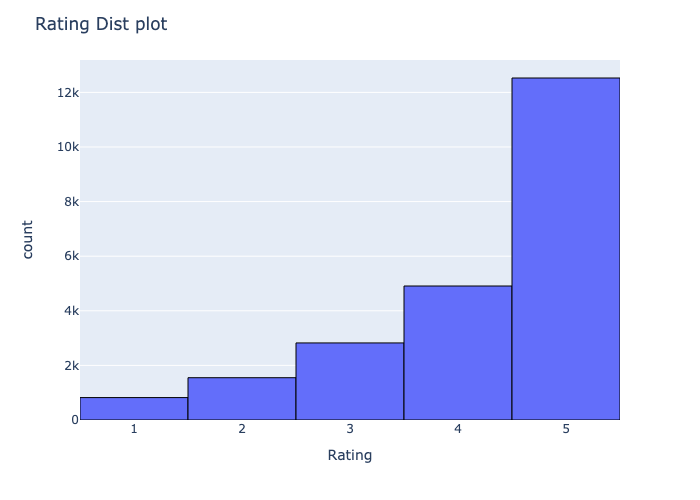

In [26]:
plot_dist(columns)

We will also check for distibuation words against sentences against reviwes

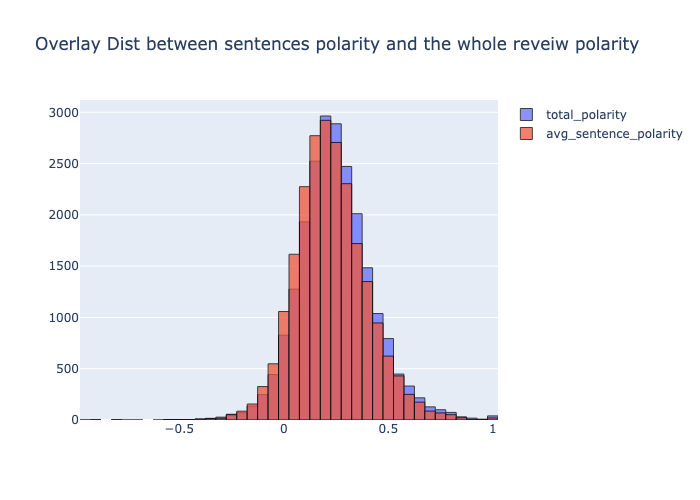

In [27]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=data['total_polarity'], name='total_polarity', nbinsx=50))
fig.add_trace(go.Histogram(x=data['avg_sentence_polarity'], name='avg_sentence_polarity', nbinsx=50))

# Overlay both histograms
fig.update_layout(barmode='overlay', title='Overlay Dist between sentences polarity and the whole reveiw polarity')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75,marker_line_width=1,marker_line_color="black")
# fig.show() # -> to display the full interactive plot
fig.show("png") # -> to display the plot in github

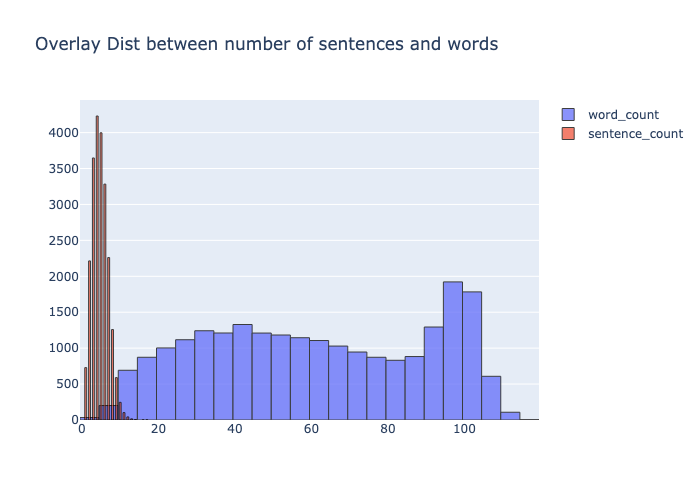

In [28]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=data['word_count'], name='word_count', nbinsx=50))
fig.add_trace(go.Histogram(x=data['sentence_count'], name='sentence_count', nbinsx=50))
# fig.add_trace(go.Histogram(x=data['review_len'], name='review_len', nbinsx=50))


# Overlay both histograms
fig.update_layout(barmode='overlay', title='Overlay Dist between number of sentences and words', 
                 hovermode='x unified')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75,marker_line_width=1,marker_line_color="black")
# fig.show() # -> to display the full interactive plot
fig.show("png") # -> to display the plot in github